#Data Science Classification Project: Loan Status Predicitions

[Dataset](https://www.kaggle.com/datasets/bhavikjikadara/loan-status-prediction/data)



*   In this Loan Status Prediction dataset, we have the data of applicants who previously applied for the loan based on the property which is a Property Loan.
*   The bank will decide whether to give a loan to the applicant based on some factors such as Applicant Income, Loan Amount, Previous Credit History, Co-applicant Income, etc…

*   Goal is to build a Machine Learning Model to predict the loan to be approved or to be rejected for an applicant.







**About the loan_data.csv file:**

**Loan_ID**: A unique loan ID.

**Gender**: Either male or female.

**Married**: Weather Married(yes) or Not Marttied(No).

**Dependents**: Number of persons depending on the client.

**Education**: Applicant Education(Graduate or Undergraduate).

**Self_Employed**: Self-employed (Yes/No).

**ApplicantIncome**: Applicant income.

**CoapplicantIncome**: Co-applicant income.

**LoanAmount**: Loan amount in thousands.

**Loan_Amount_Term**: Terms of the loan in months.

**Credit_History**: Credit history meets guidelines.

**Property_Area**: Applicants are living either Urban, Semi-Urban or Rural.

**Loan_Status**: Loan approved (Y/N).


##Importing the libraries

In [391]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

##Importing the dataset

In [392]:
df = pd.read_csv("/content/loan_data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [393]:
df.shape

(381, 13)

##Data Cleaning and Validation

In [394]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [395]:
df.duplicated().sum()

0

In [396]:
df['Gender'].value_counts()

Male      291
Female     85
Name: Gender, dtype: int64

In [397]:
df['Gender'].fillna('Male', inplace=True)

In [398]:
df['Dependents'].nunique()

4

In [399]:
df['Dependents'].value_counts()

0     234
2      59
1      52
3+     28
Name: Dependents, dtype: int64

In [400]:
df['Dependents'].fillna(0 , inplace=True)

In [401]:
#Convert 'Dependents' to numeric type, ignoring errors
df['Dependents'] = pd.to_numeric(df['Dependents'], errors='coerce')

In [402]:
#Replace NaN values with '3 or more' and convert the column back to string type
df['Dependents'] = df['Dependents'].fillna('3 or more').astype(str)

In [403]:
df['Education'].value_counts()

Graduate        278
Not Graduate    103
Name: Education, dtype: int64

In [404]:
df['Self_Employed'].value_counts()

No     325
Yes     35
Name: Self_Employed, dtype: int64

In [405]:
df['Self_Employed'].fillna('No', inplace=True)

In [406]:
df['Property_Area'].value_counts()

Semiurban    149
Urban        126
Rural        106
Name: Property_Area, dtype: int64

In [407]:
df['Credit_History'].value_counts()

1.0    294
0.0     57
Name: Credit_History, dtype: int64

In [408]:
df['Credit_History'].fillna(0.0 , inplace=True)

In [409]:
df['Loan_Amount_Term'].value_counts()

360.0    312
180.0     29
480.0     11
300.0      7
120.0      3
84.0       3
240.0      2
60.0       1
12.0       1
36.0       1
Name: Loan_Amount_Term, dtype: int64

In [410]:
df['Loan_Amount_Term'].fillna(360.0 , inplace=True)

In [411]:
df['Loan_Status'].value_counts()

Y    271
N    110
Name: Loan_Status, dtype: int64

In [412]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [413]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,381.000000,381.000000
mean,3579.845144,1277.275381,104.986877,341.417323,0.771654
std,1419.813818,2340.818114,28.358464,67.625957,0.420319
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


##EDA

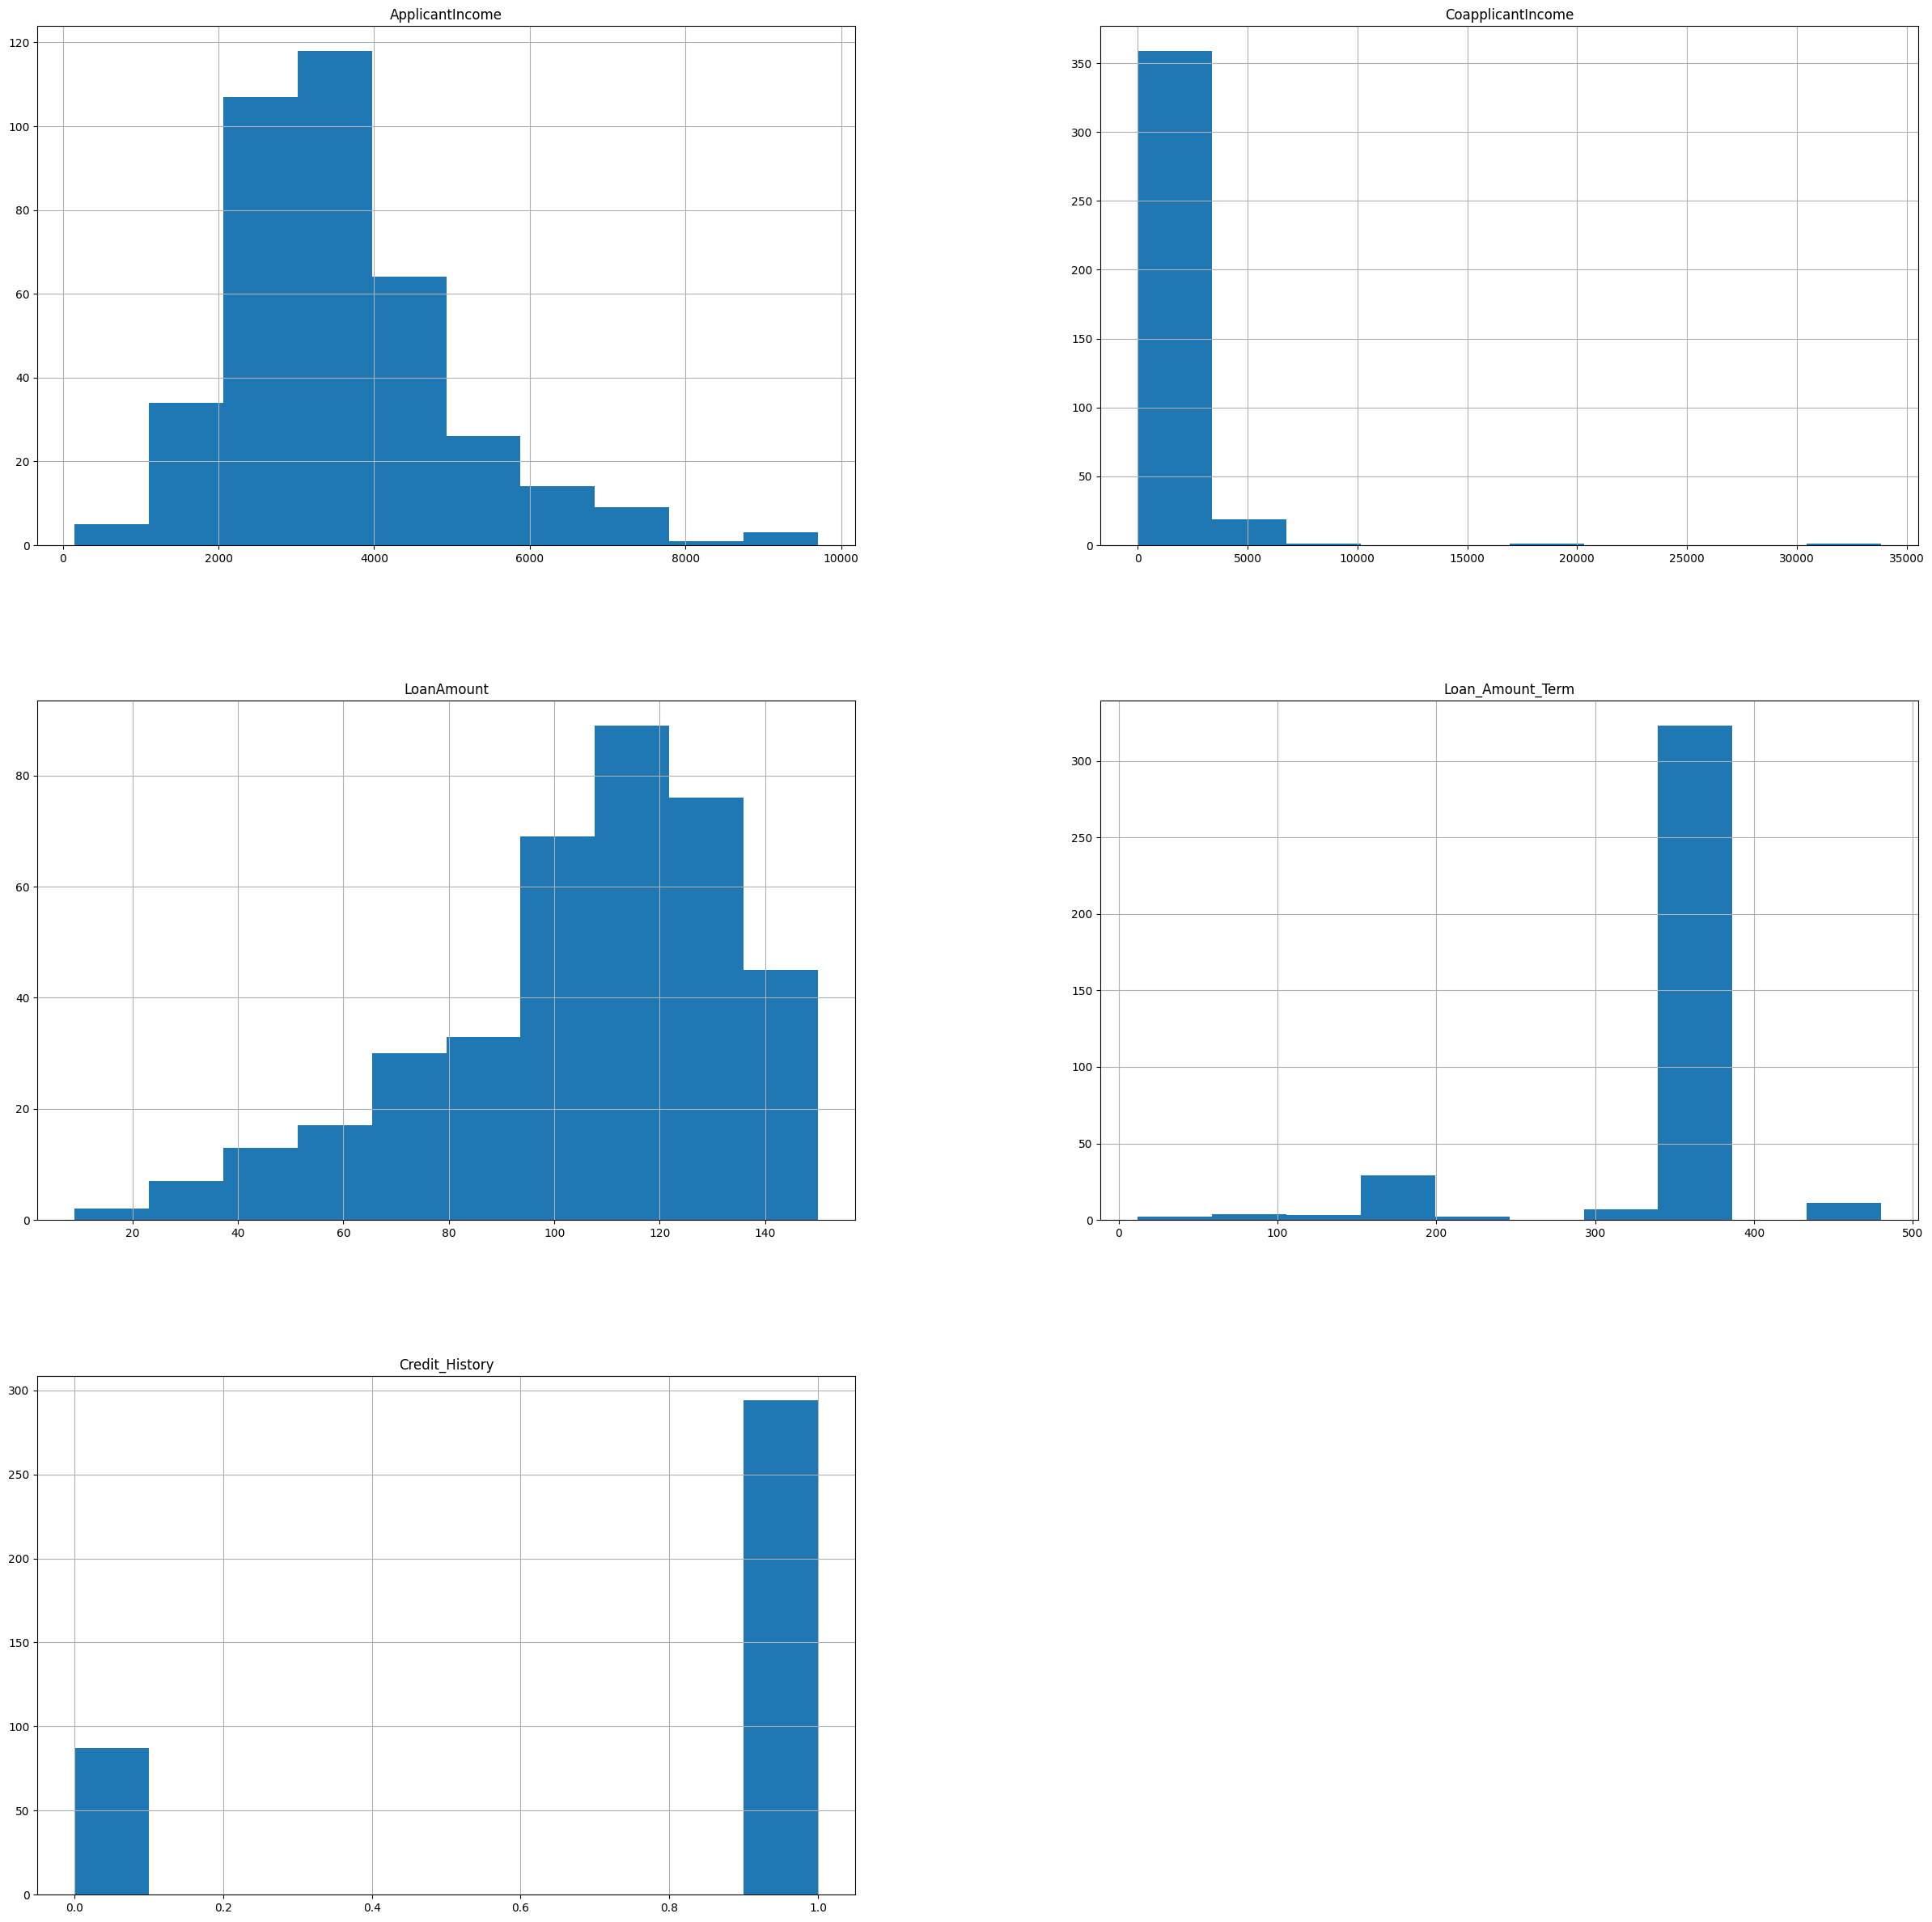

In [414]:
df.hist(figsize=(30,30))
plt.show()

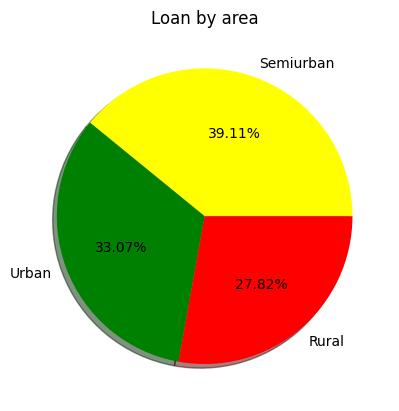

In [415]:
plt.pie(df['Property_Area'].value_counts().values,labels =df['Property_Area'].value_counts().index,
       autopct='%1.2f%%',shadow=True,colors=['yellow','green',"red"])
plt.title('Loan by area')
plt.show()

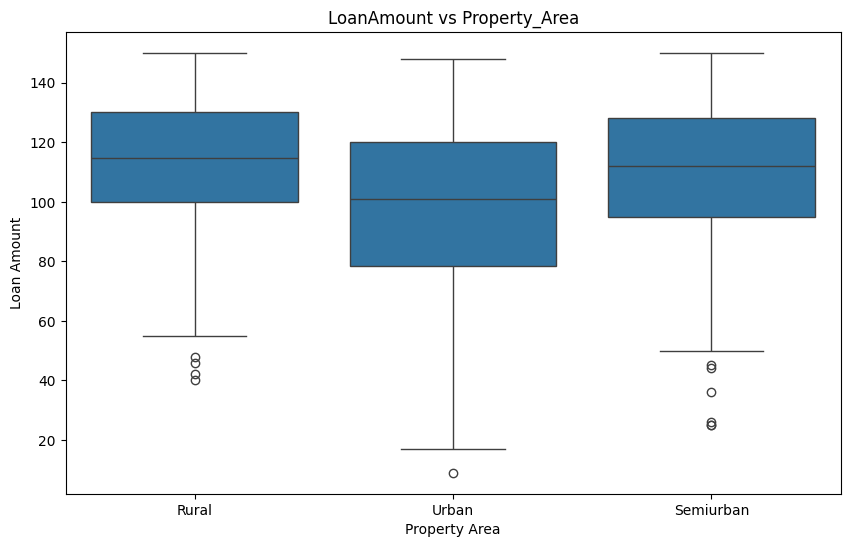

In [416]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Property_Area', y='LoanAmount', data=df)
plt.title('LoanAmount vs Property_Area')
plt.xlabel('Property Area')
plt.ylabel('Loan Amount')
plt.show()

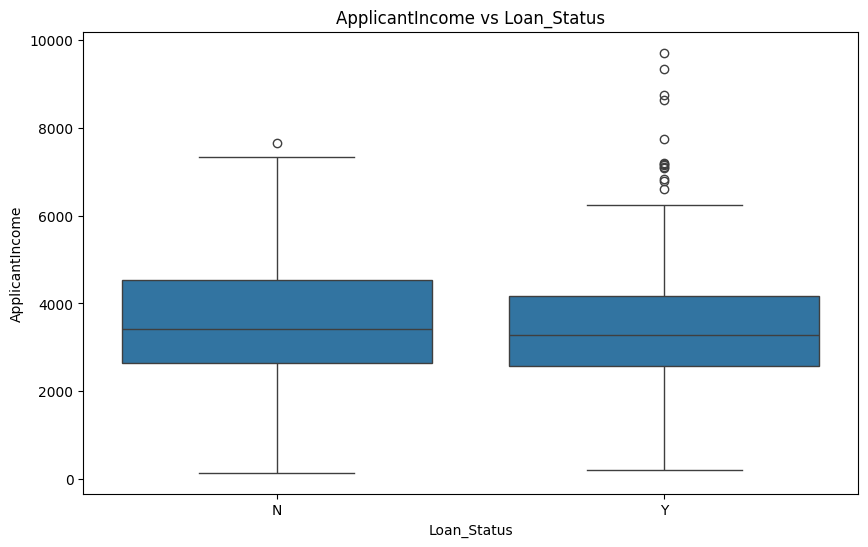

In [417]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title('ApplicantIncome vs Loan_Status')
plt.xlabel('Loan_Status')
plt.ylabel('ApplicantIncome')
plt.show()

##Outlier detection and cleaning

In [418]:
def find_outlier_rows(df, col, level='both'):
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)

    lower_bound = df[col].quantile(0.25) - 1.5 * iqr
    upper_bound = df[col].quantile(0.75) + 1.5 * iqr

    if level == 'lower':
        return df[df[col] < lower_bound]
    elif level == 'upper':
        return df[df[col] > upper_bound]
    else:
        return df[(df[col] > upper_bound) | (df[col] < lower_bound)]

In [419]:
def count_outliers(df):
    df_numeric = df.select_dtypes(include=['int', 'float'])

    columns = df_numeric.columns

    outlier_cols = [col for col in columns if len(find_outlier_rows(df_numeric, col)) != 0]

    outliers_df = pd.DataFrame(columns=['outlier_counts', 'outlier_percent'])

    for col in outlier_cols:
        outlier_count = len(find_outlier_rows(df_numeric, col))
        all_entries = len(df[col])
        outlier_percent = round(outlier_count * 100 / all_entries, 2)

        outliers_df.loc[col] = [outlier_count, outlier_percent]

    return outliers_df

In [420]:
count_outliers(df).sort_values('outlier_counts', ascending=False)

,outlier_counts,outlier_percent
Credit_History,87.0,22.83
Loan_Amount_Term,58.0,15.22
ApplicantIncome,14.0,3.67
LoanAmount,7.0,1.84
CoapplicantIncome,6.0,1.57


In [421]:
l = ["Loan_Amount_Term", "ApplicantIncome", "CoapplicantIncome"]
def outlier_removal(l):
    for i in l:
        Q1  = df[i].quantile(0.25)
        Q3  = df[i].quantile(0.75)
        IQR = Q3-Q1
        Uper = Q3+1.5*IQR
        lower = Q1-1.5*IQR
        df[i]  = np.where(df[i]>Uper,Uper,(np.where(df[i]<lower,lower,df[i])))
outlier_removal(l)

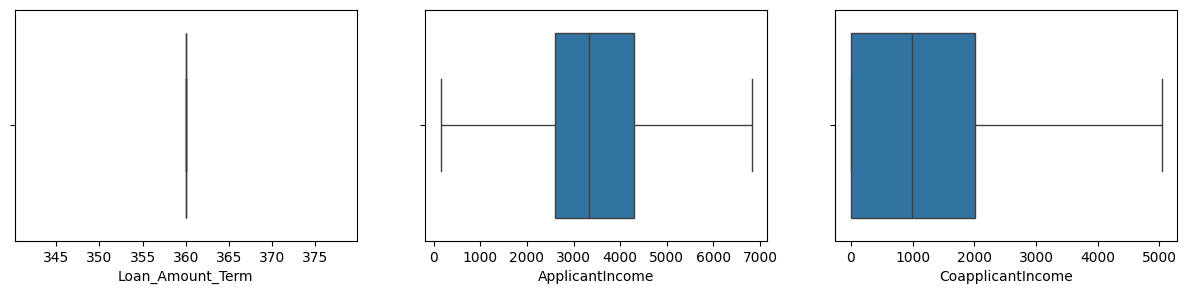

In [422]:
n = 1
cols =["Loan_Amount_Term", "ApplicantIncome", "CoapplicantIncome"]
plt.figure(figsize=(15,3))
for i in cols:
        if n<=3:
            plt.subplot(1,3,n);
            n+=1
            sns.boxplot(x = df[i])
            plt.xlabel(i)

In [423]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,381.0,381.000000
mean,3544.624672,1147.070656,104.986877,360.0,0.771654
std,1312.416395,1288.712177,28.358464,0.0,0.420319
min,150.000000,0.000000,9.000000,360.0,0.000000
25%,2600.000000,0.000000,90.000000,360.0,1.000000
50%,3333.000000,983.000000,110.000000,360.0,1.000000
75%,4288.000000,2016.000000,127.000000,360.0,1.000000
max,6820.000000,5040.000000,150.000000,360.0,1.000000


In [424]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

##Label Encoding

In [425]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

In [426]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
1,LP001005,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
2,LP001006,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
3,LP001008,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1
4,LP001013,1,1,0,1,0,2333.0,1516.0,95.0,360.0,1.0,2,1


In [427]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.0,381.000000,381.000000,381.000000
mean,0.776903,0.598425,0.666667,0.270341,0.091864,3544.624672,1147.070656,104.986877,360.0,0.771654,1.052493,0.711286
std,0.416870,0.490861,0.987643,0.444720,0.289213,1312.416395,1288.712177,28.358464,0.0,0.420319,0.779592,0.453761
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,360.0,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2600.000000,0.000000,90.000000,360.0,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3333.000000,983.000000,110.000000,360.0,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,4288.000000,2016.000000,127.000000,360.0,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,6820.000000,5040.000000,150.000000,360.0,1.000000,2.000000,1.000000


##Feature Selection

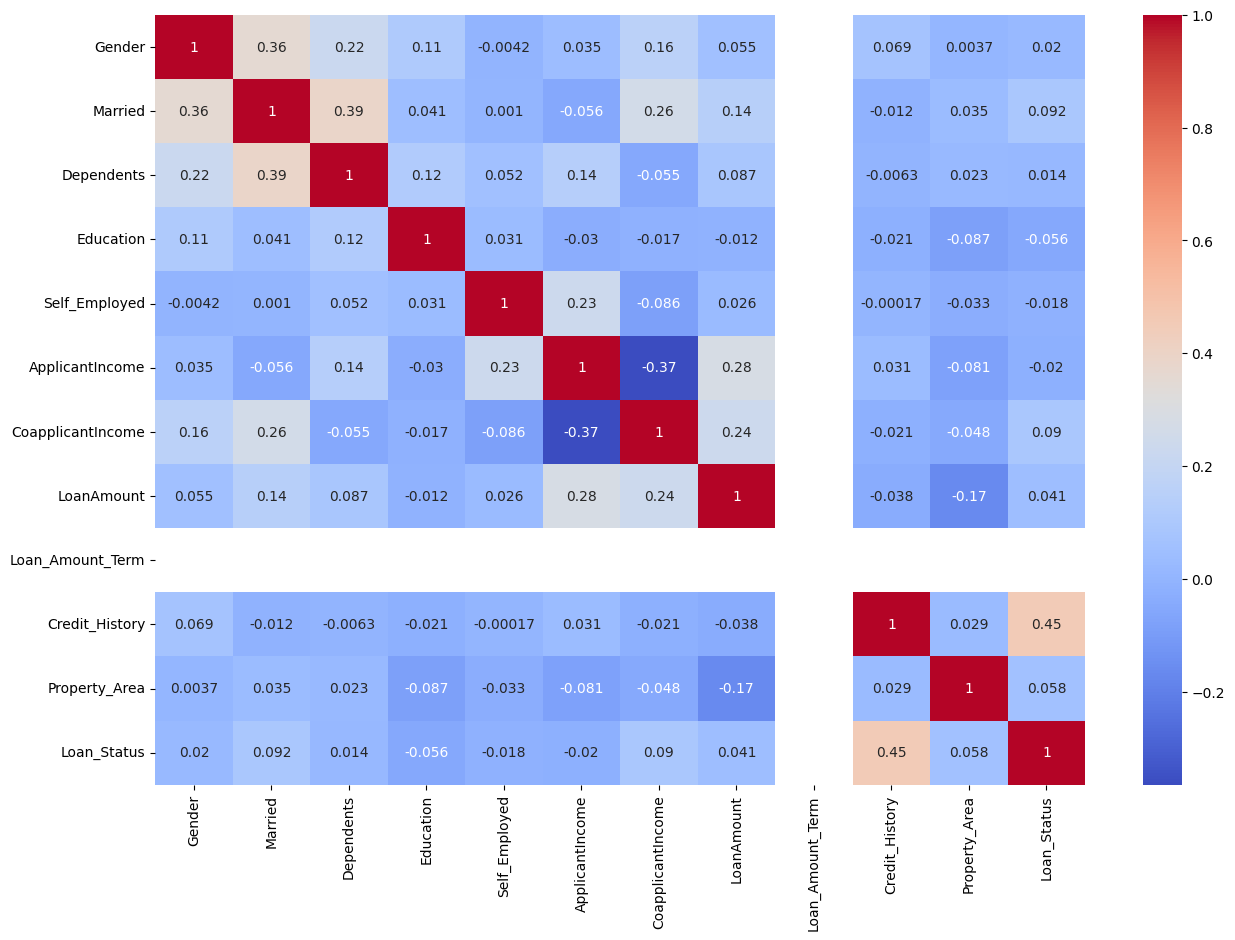

In [428]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.show()

In [429]:
X = df.drop(columns=['Loan_ID', 'Gender', 'Loan_Status'])
y = df[['Loan_Status']]

##Spltting the dataset into Training set and Testings set

In [430]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Standardizing the dataset

In [431]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

##1. Logistic Regression to predict the loan status

In [432]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [433]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,classification_report,confusion_matrix

In [434]:
cm = (confusion_matrix(y_test,y_pred))
cm

array([[ 8, 13],
       [ 6, 50]])

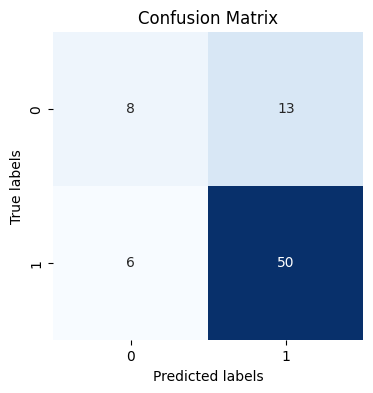

In [435]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [436]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.38      0.46        21
           1       0.79      0.89      0.84        56

    accuracy                           0.75        77
   macro avg       0.68      0.64      0.65        77
weighted avg       0.73      0.75      0.74        77



##2. Decision Tree Classifier to predict the loan status

In [437]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)

In [438]:
cm = (confusion_matrix(y_test,y_pred))
cm

array([[ 6, 15],
       [13, 43]])

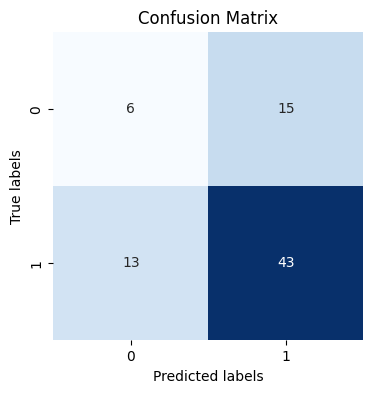

In [439]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [440]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.32      0.29      0.30        21
           1       0.74      0.77      0.75        56

    accuracy                           0.64        77
   macro avg       0.53      0.53      0.53        77
weighted avg       0.63      0.64      0.63        77



##3. Random Forest Classifier to predict the loan status

In [441]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

In [442]:
cm = (confusion_matrix(y_test,y_pred))
cm

array([[ 6, 15],
       [ 5, 51]])

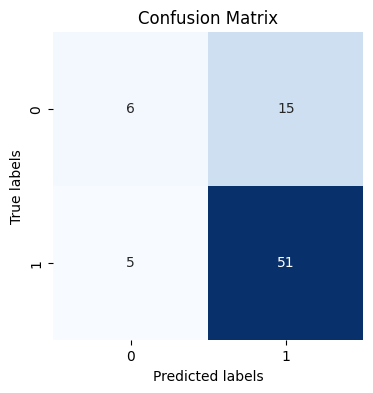

In [443]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [444]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.29      0.37        21
           1       0.77      0.91      0.84        56

    accuracy                           0.74        77
   macro avg       0.66      0.60      0.61        77
weighted avg       0.71      0.74      0.71        77



##4. Support Vector Machine Classifier to predict the loan status

In [445]:
#Support Vector Machine
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

In [446]:
cm = (confusion_matrix(y_test,y_pred))
cm

array([[ 7, 14],
       [ 6, 50]])

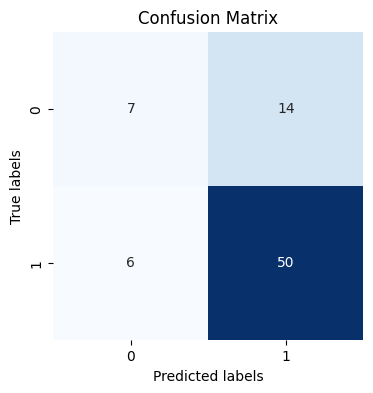

In [447]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [448]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.33      0.41        21
           1       0.78      0.89      0.83        56

    accuracy                           0.74        77
   macro avg       0.66      0.61      0.62        77
weighted avg       0.72      0.74      0.72        77



##5. K-Nearest Neighbour Classifier to predict the loan status

In [449]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knc= KNeighborsClassifier()
knc.fit(x_train,y_train)
y_pred=knc.predict(x_test)

In [450]:
cm = (confusion_matrix(y_test,y_pred))
cm

array([[ 6, 15],
       [ 9, 47]])

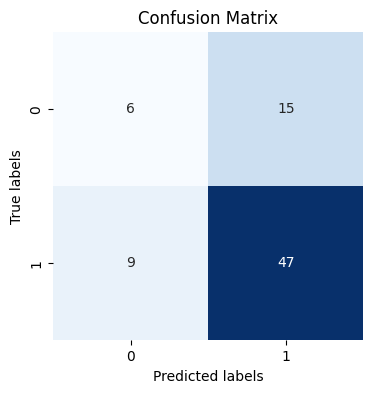

In [451]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [452]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.40      0.29      0.33        21
           1       0.76      0.84      0.80        56

    accuracy                           0.69        77
   macro avg       0.58      0.56      0.56        77
weighted avg       0.66      0.69      0.67        77



##6. XG Boost Classifier to predict the loan status

In [453]:
#XGBoost
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(x_train,y_train)
y_pred = xgb_clf.predict(x_test)

In [454]:
cm = (confusion_matrix(y_test,y_pred))
cm

array([[11, 10],
       [ 6, 50]])

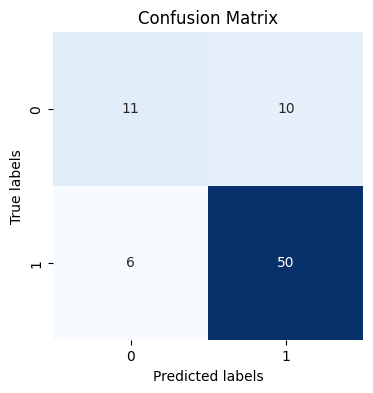

In [455]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [456]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.52      0.58        21
           1       0.83      0.89      0.86        56

    accuracy                           0.79        77
   macro avg       0.74      0.71      0.72        77
weighted avg       0.78      0.79      0.78        77



##Conclusion:
Analyse the dataset, convert it into numeric values using labelecoding, split into train set contain 80% and test set contain 20% data, standardize the features, apply 6 machine learning classification models: Logistic Regression, Decision Tree Classifier, Random Forest Classifier, Support Vector Machine Classifier, K-Nearest Neighbor Classifier and XG Boost Classifier with this six models XG Boost contains the best 79% accuracy to predict the status of loan approved (Y) or Not (N).